In [1]:
import numpy as np
import pandas as pd

# Set random seed to ensure reproducible runs
RSEED = 50

In [2]:
# Создадим матрицу
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])
# Создадим вектор
y = np.array([0, 1, 1, 1, 0, 1])

In [4]:
# чтобы почувствовать данные создадим визуализацию
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


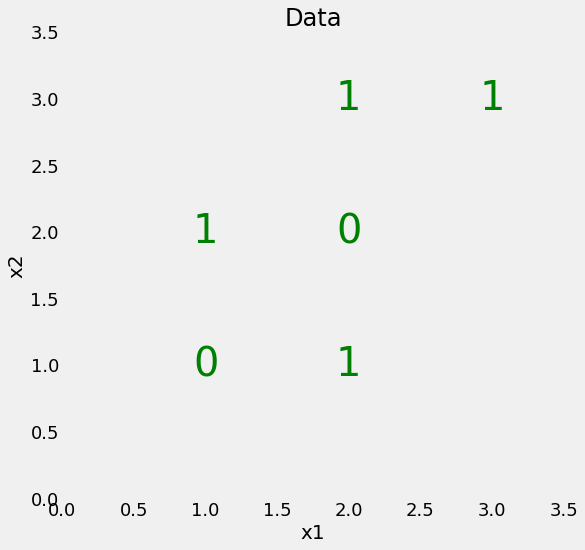

In [19]:
# Форматирование графика
# Чтобы посмотреть доступные стили оформления графика 
# plt.style.available
# Выберем стиль
plt.style.use('fivethirtyeight')
# Устанавливаем размер шрифта
plt.rcParams['font.size'] = 18
# Устанавливаем размер холста
plt.figure(figsize=(8,8))

# создаем метки
# X[:,0] - первый столбец матрицы.
# X[:,1] - второй столбец матрицы.Помним что при срезе первый аргумент это строки
for x1, x2 , label in zip(X[:,0],X[:,1],y):
    plt.text(x1,x2,str(label),fontsize=40, color= 'g',
            ha='center',va='center')

# plt.text- добавляет названия точек, по умолчанию это координаты

# plt.grid() - отключает сетку
plt.grid();
# plt.xlim and ylim это разметка осей абсцисс и ординат
plt.xlim((0,3.5));
plt.ylim((0,3.5));
# plt.xlabel - подпись оси абсцисс
plt.xlabel('x1',size=20);
# plt.ylabel - подпись оси ординат
plt.ylabel('x2',size=20)
# plt.title - Название графика
plt.title('Data',size=24);

In [21]:
# Импортируем класс для создания дерева решений
from sklearn.tree import DecisionTreeClassifier

In [22]:
# Создадим и обучим дерево решений
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [23]:
print('Model Accuracy: ',tree.score(X,y))

Model Accuracy:  1.0


### Чтоже происходит в внутри дерева решений?
Для этого визуализируем дерево

In [24]:
from sklearn.tree import export_graphviz

In [33]:
# Экспортируем картинку как дот файл
export_graphviz(tree,'tree.dot',rounded=True,
               feature_names=['x1','x2'],
                class_names=['0','1'], filled =True)

In [34]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

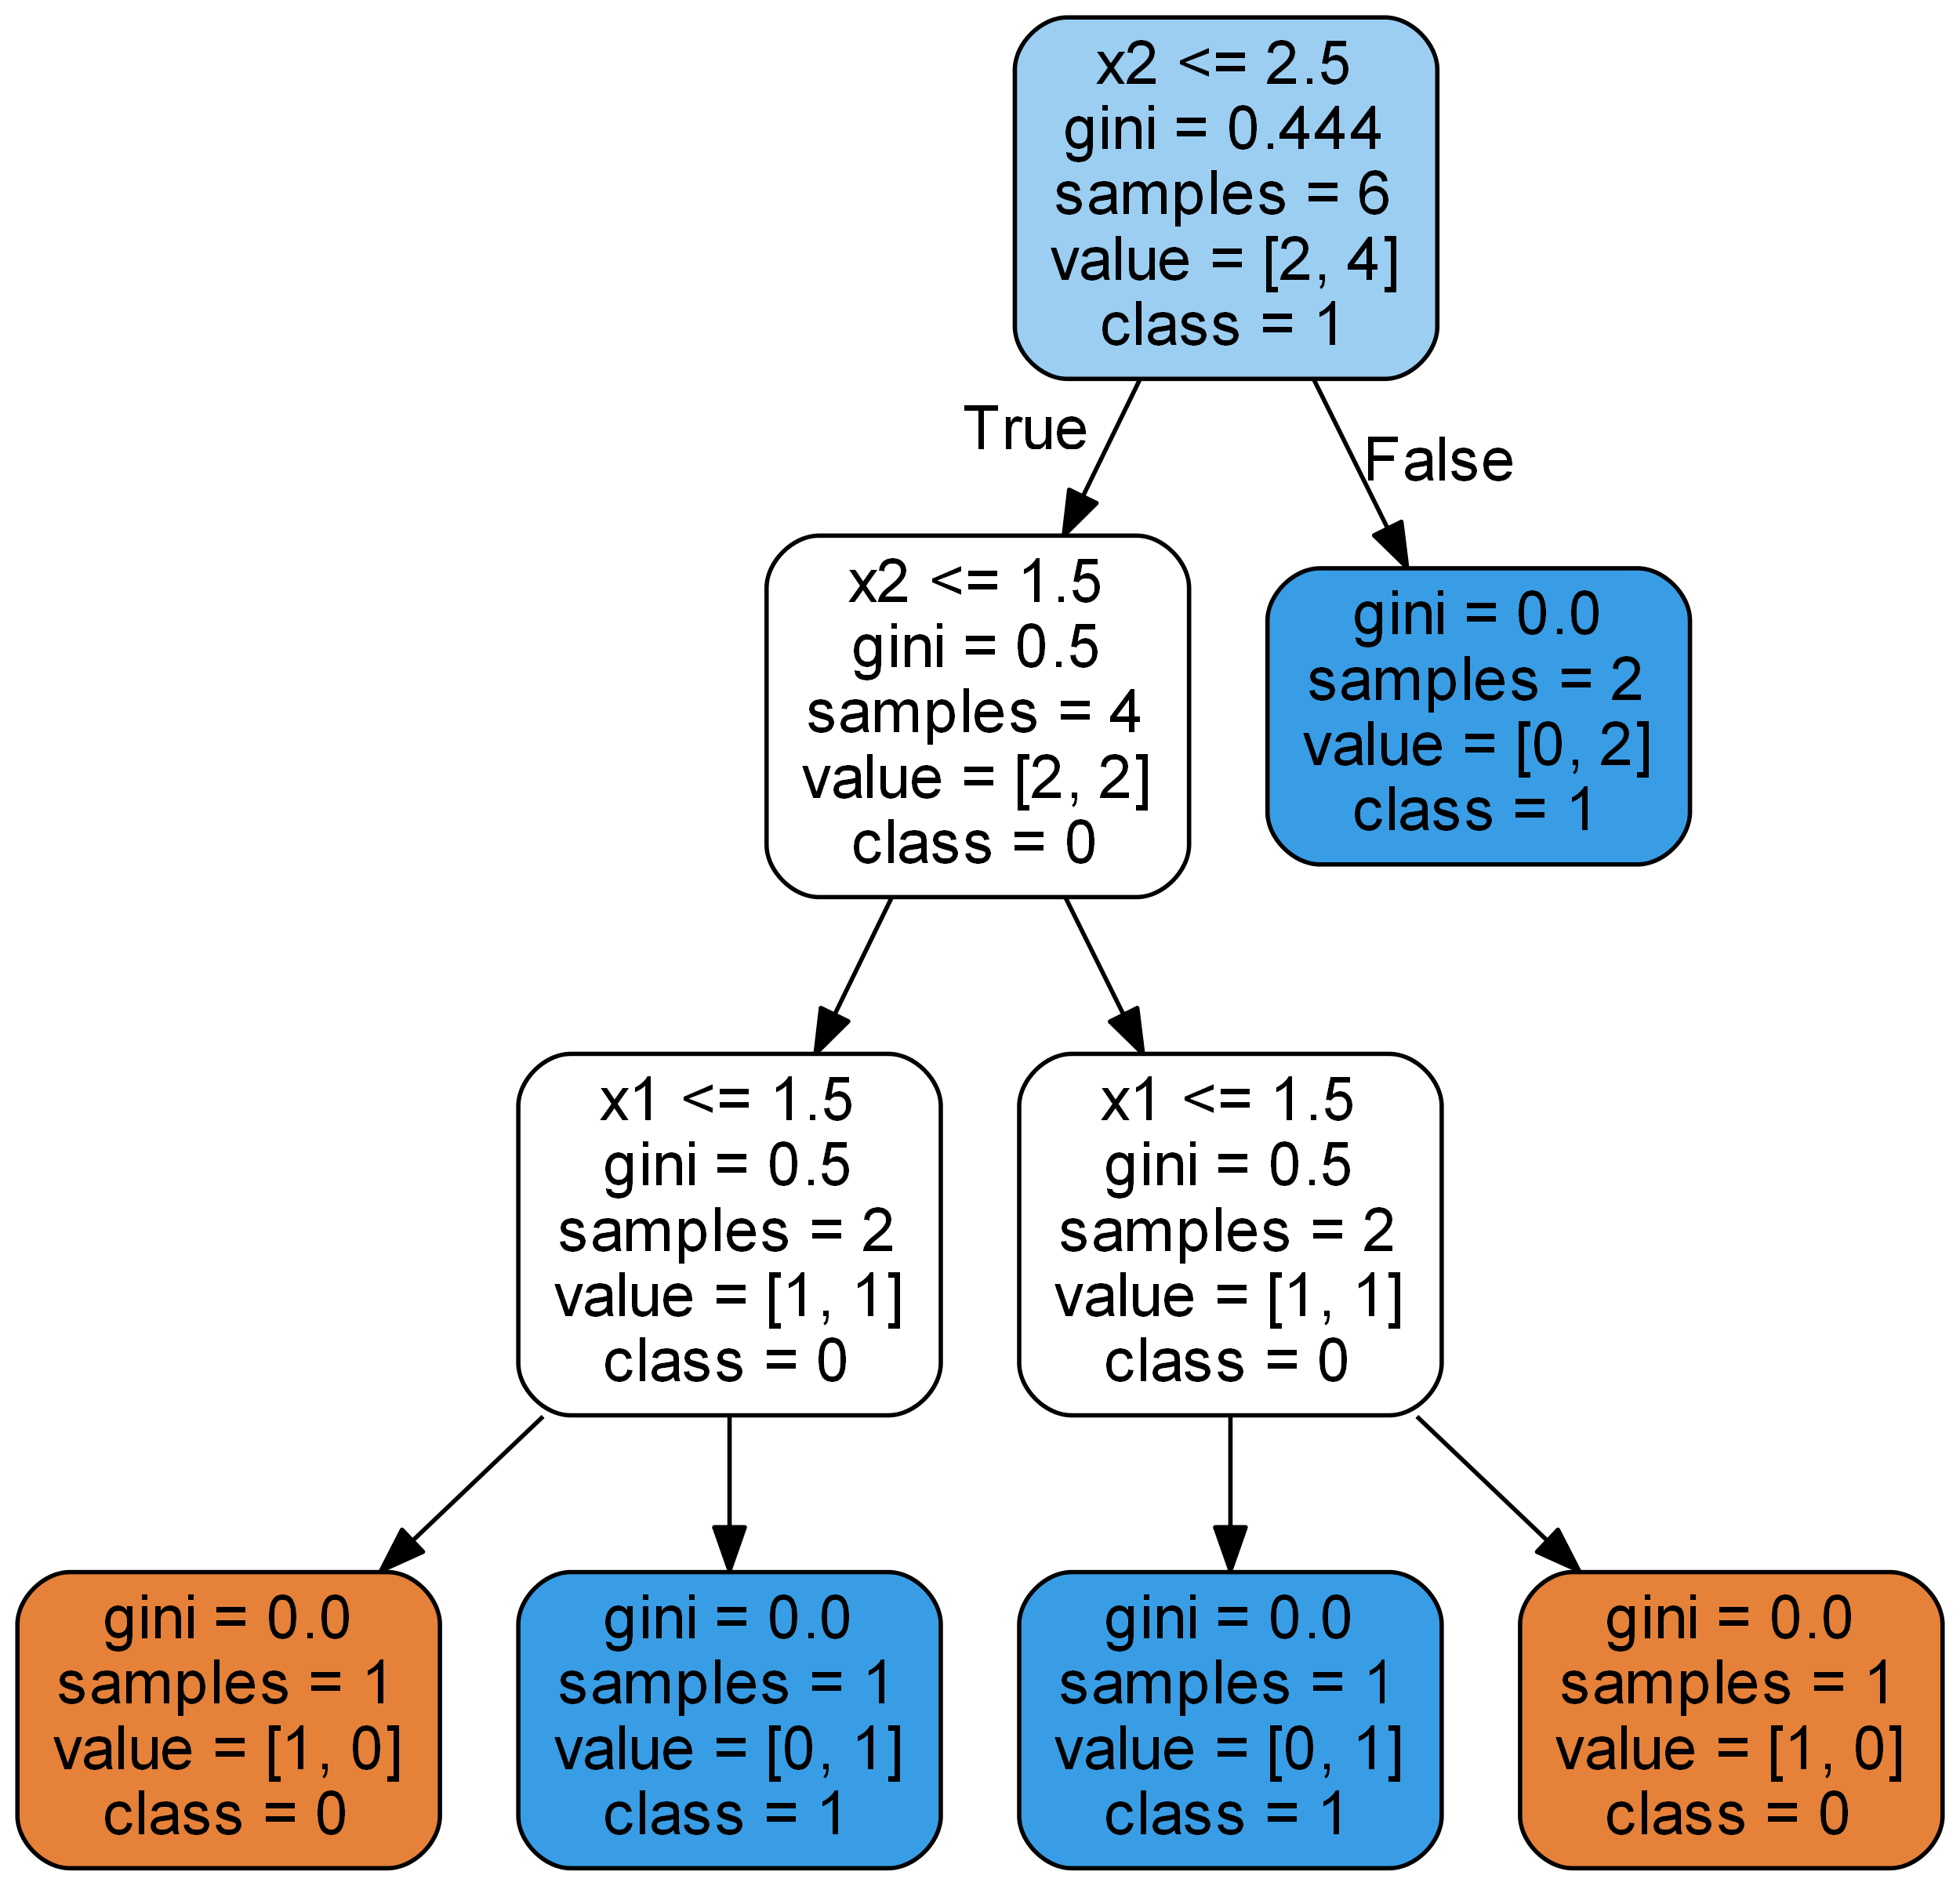

In [35]:
from IPython.display import Image
Image('tree.png')

Наша модель идеально подстроилась под тренировчные данные
Но когда к нам придут новые данные , она не сможет верно распределить данные
Чтобы избежать переобучения уменьшим количество разделений


In [36]:
short_tree = DecisionTreeClassifier(random_state=RSEED,
                                   max_depth=2)
short_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

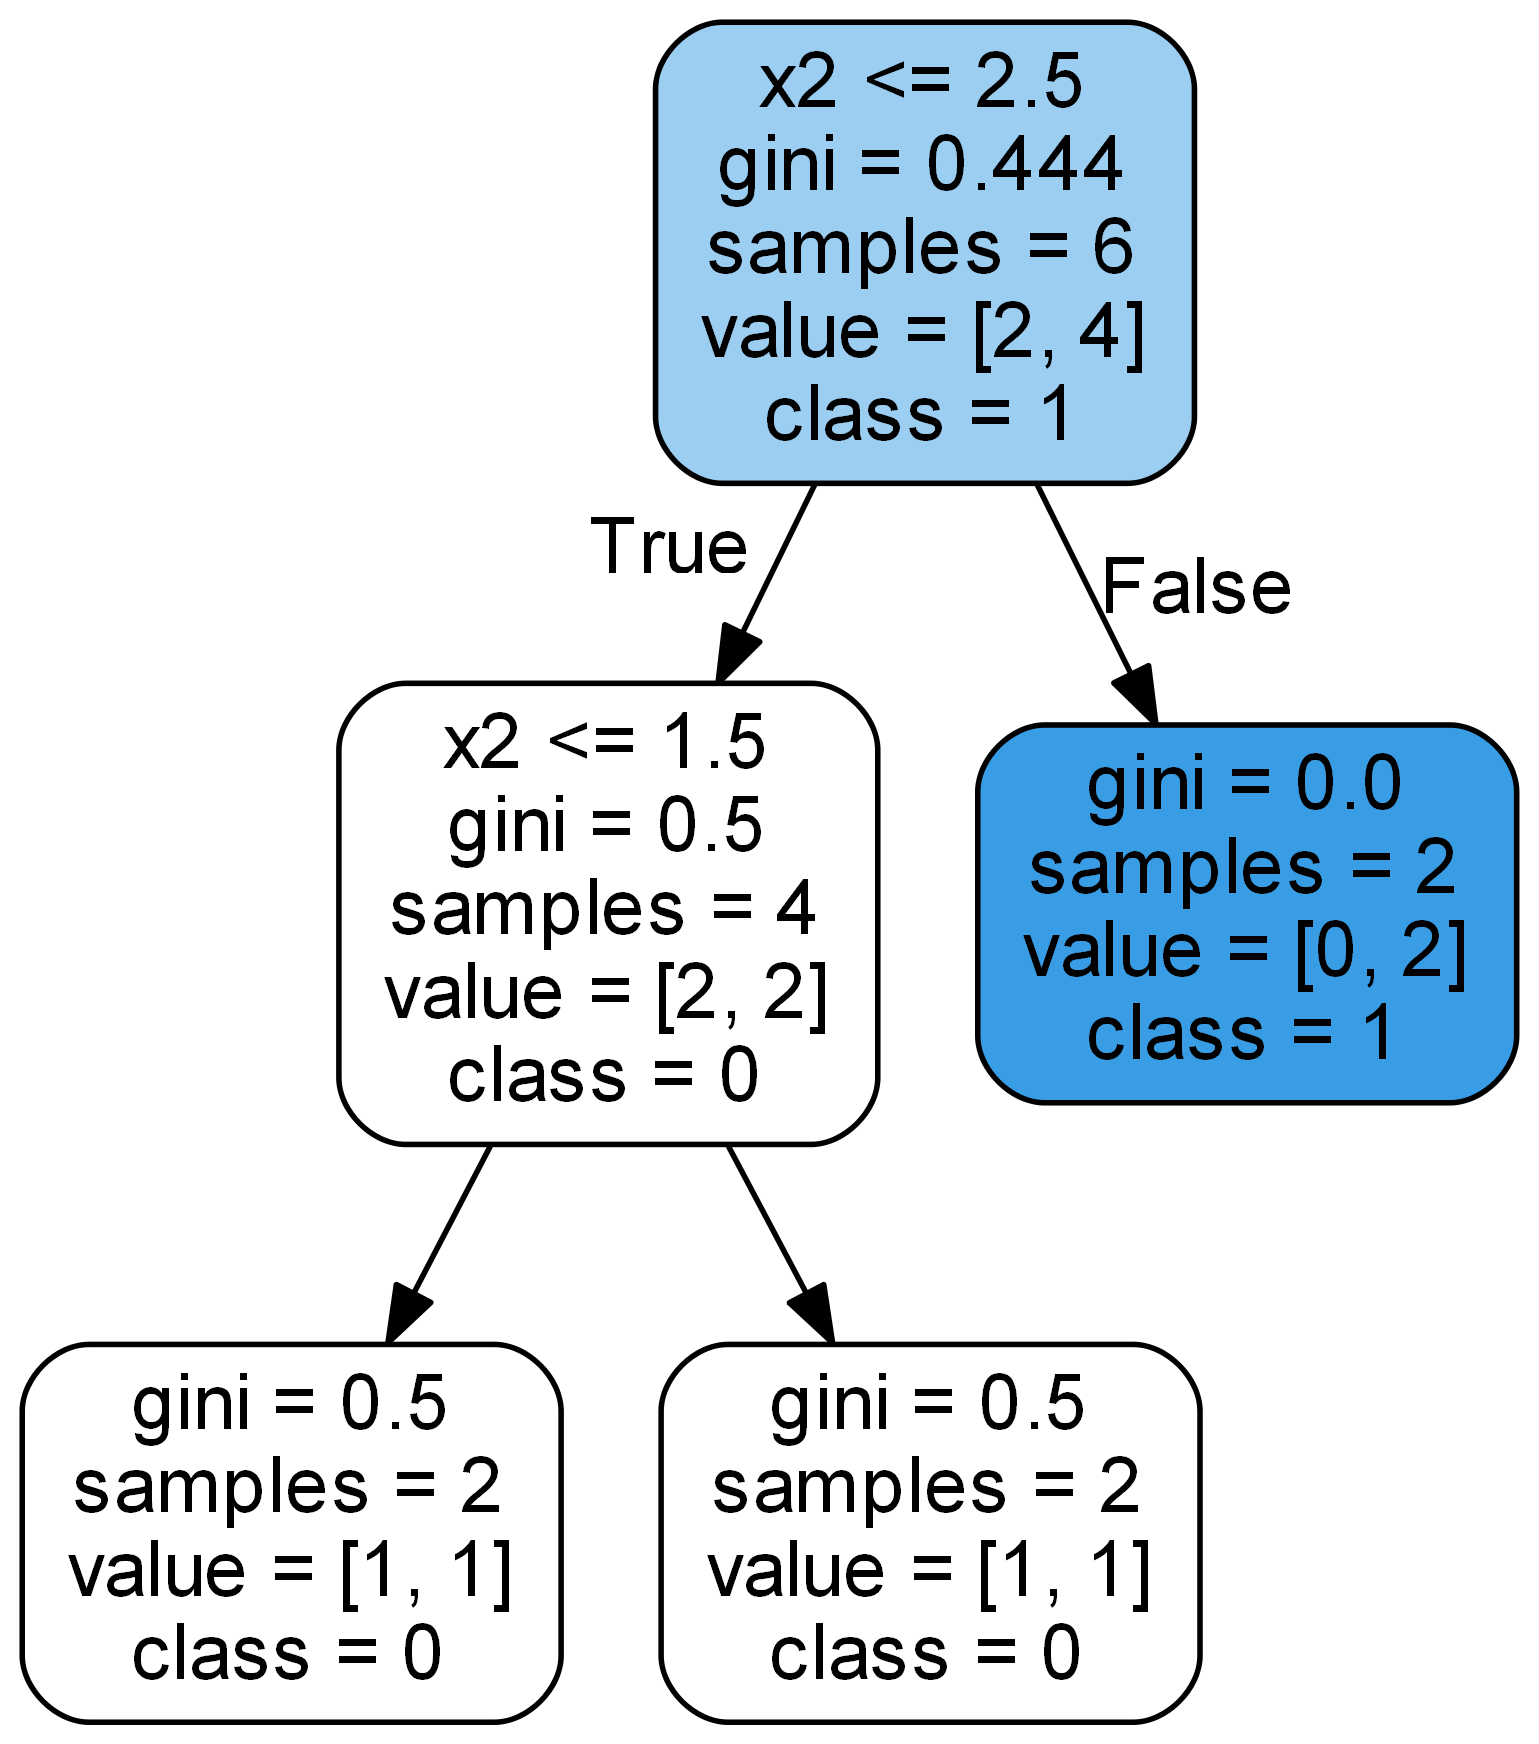

In [37]:
# Посмотрим на получившееся дерево

# Export as dot
export_graphviz(short_tree, 'shorttree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

call(['dot', '-Tpng', 'shorttree.dot', '-o', 'shorttree.png', '-Gdpi=400']);
Image('shorttree.png')

In [ ]:
# как видим в последних листах у нас осталось по одному примеру каждого класса
# Но эти листы были отнесены к классу 0, хотя там есть другие классы
# Нужно помнить, что если глубина ограничена то лист принимает значение класса
# того узла от которого унаследовался(проще было написать родительского) 

In [47]:
df = pd.read_csv('../../data/beauty.csv',sep=';')

In [48]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [49]:
looks = np.array(df.pop('looks'))

In [50]:
looks

array([4, 3, 4, ..., 3, 3, 3], dtype=int64)

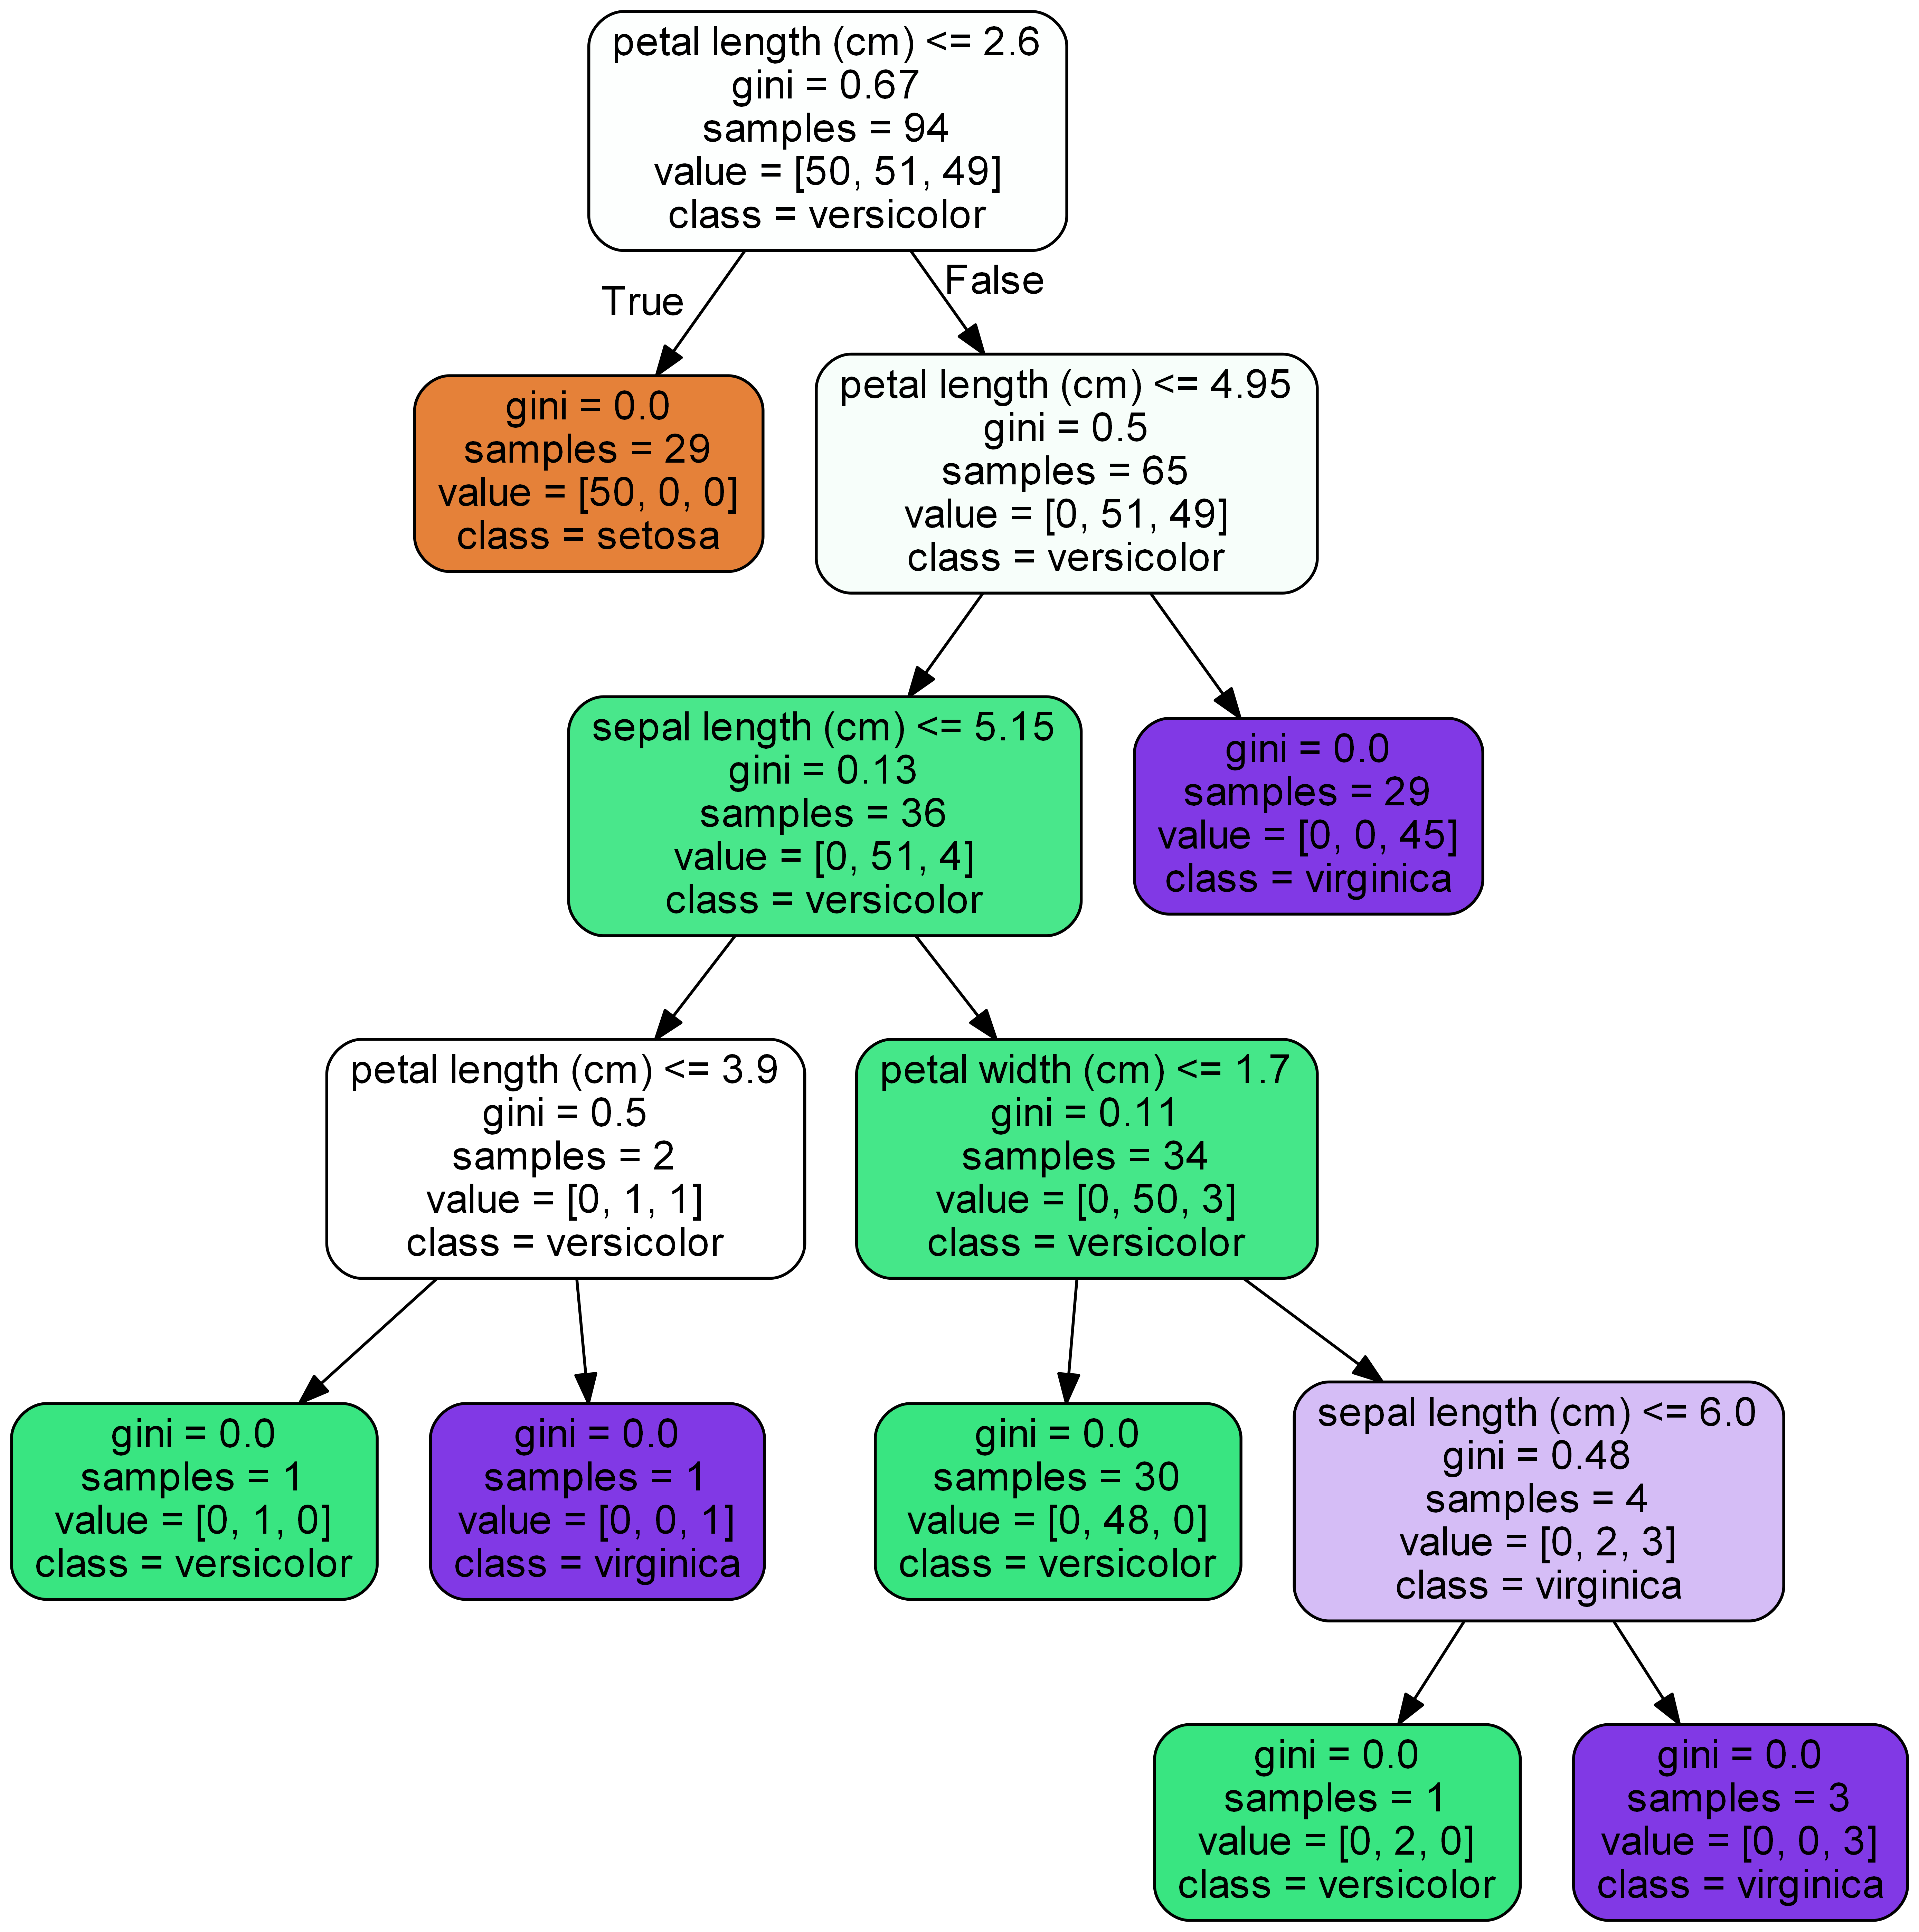

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')